## Otimização por Colônia de Formigas - Algoritmo de Colônia de Formigas (ACO)

- Técnica inspirada na busca de alimento realizada por colônias de formigas, a qual é utilizada, normalmente, em problemas de otimização.

- A ideia reside no mecanismo de comunicação indireta através de sinais quimicos(feromônios), utilizado por diversas espécies de formigas sociais em busca por alimentos.

- As formigas buscam por alimentos próximos de forma aleatório, sendo que a força da trilha de feromônio cresce rapidamente para fontes próximas e para trilhas mais curtas.

- As trilhas surgem ao longo do tempo, como uma memória coletiva, formando uma rota entre a colônia e a fonte de alimento.

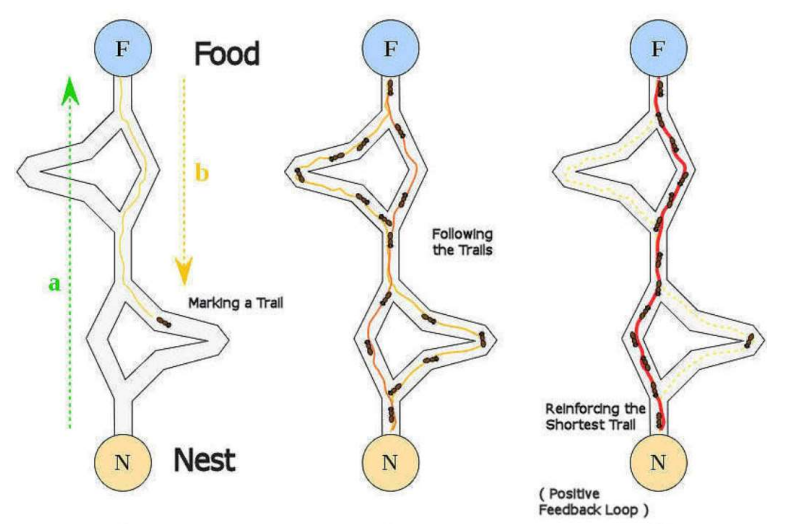

In [1]:
# Instalação e Importação

# https://pypi.org/project/ACO-Pants/
!pip install ACO-Pants # Instalação de ACO-Pants

import pants
import math
import random
import numpy

  Preparing metadata (setup.py) ... done
  Created wheel for ACO-Pants: filename=ACO_Pants-0.5.2-py3-none-any.whl size=18840 sha256=33401e6cd615b735858d460103a50cd3d51dfd01f777723d1c836f808b1c931e
  Stored in directory: /root/.cache/pip/wheels/18/20/45/4dc8bf8059c641765ecbbaf092ec25ad79f7deaa51662a68c8
Successfully built ACO-Pants


## Problema e forma de solucionar

- O início da aplicação da ACO envolve a conversão do problema escolhido em um grafo, no qual a rota, indicando a trilha mais intensa de feromônios, corresponde à solução desejada. O objetivo é determinar um percurso otimizado através desse grafo.

- Nesse contexto, a escolha natural é o clássico Problema do Caixeiro Viajante. Este problema consiste em encontrar a rota mais curta para visitar um conjunto de cidades, passando por cada uma exatamente uma vez e retornando à cidade de origem.

- O espaço de estados para esse problema pode ser visualizado como um grafo completamente conexo, em que os vértices representam as cidades e as arestas denotam as vias entre elas, cada uma associada a uma distância (ou custo).

- Um código fornecido abaixo permite a geração de um grafo para o Problema do Caixeiro Viajante, com a flexibilidade de o usuário escolher o número de cidades. O grafo é representado por uma matriz bidimensional, onde as distâncias são valores inteiros aleatórios no intervalo entre 10 e 100.

In [2]:
# Geração do grafo para o problema do caixeiro

def graphTSP(numCities, minDist, maxDist): # (numCities : número de cidades, minDist: Menor valor de Distancia, maxDist: Maior valor de distancia)
  cities = numpy.zeros((numCities, numCities), dtype = int)
  for i in range(numCities):
    for j in range(numCities):
      if (j>i):
        cities[i, j] = random.randint(minDist, maxDist)
      elif (j<i):
        cities[i, j] = cities[j, i]
  return cities #  Grafo de cidades (Matriz numCities X numCities).

numCities = 5     #  Número de cidade inicial

while(True):
  numCities = int(input('Digite o número de cidades: '))
  if (numCities > 4):
    break
  else:
    print('O número de cidades deve ser maior que 4!')

cities = graphTSP(numCities, 10, 100)

def dist(cid1, cid2): # (cid1: Vertice de Origem, cid2: Vertice de Destino)
  return cities[cid1][cid2] # Distância entre as cidades (custo da aresta)

print('Cidades:')
print(cities)

Digite o número de cidades: 5
cidades:
[[ 0 40 10 32 41]
 [40  0 43 75 94]
 [10 43  0 87 89]
 [32 75 87  0 24]
 [41 94 89 24  0]]


In [7]:
# Representação do mundo
nodes = list(range(numCities))

# Criação da representação a partir dos nodes e distância das cidades
world = pants.World(nodes, dist)

# Solver
solver = pants.Solver()

# Melhor Solução
solution = solver.solve(world)

print("Caminho :", solution.tour) # Realizando o percurso
print("Custo Total :", solution.distance) # Custo do melhor caminho encontrado


Caminho : [1, 2, 0, 4, 3]
Custo Total : 193
